- Name:  Sarah Sun (Hanyue Sun)
- Student ID:  219600845
- Email:  sunhan@deakin.edu.au
- Lab Session and Tutor (for on campus students): Tuesday 4pm 

 Part I - Web Log Data
 1. Data ETL
 1.1 Data Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib

Load Hotel TULIP data into dataframe df_ht and check how many files are loaded.

In [2]:
from zipfile import ZipFile
df_ht=ZipFile("HTWebLog_p1.zip", "r")  
for filenames in df_ht.namelist():
    print ('Hotel:',filenames)

Hotel: ex061101.log
Hotel: ex061102.log
Hotel: ex061103.log
Hotel: ex061104.log
Hotel: ex061105.log
Hotel: ex061106.log
Hotel: ex061107.log
Hotel: ex061108.log
Hotel: ex061109.log
Hotel: ex061110.log
Hotel: ex061111.log
Hotel: ex061112.log
Hotel: ex061113.log
Hotel: ex061114.log
Hotel: ex061115.log
Hotel: ex061116.log
Hotel: ex061117.log
Hotel: ex061118.log
Hotel: ex061119.log
Hotel: ex061120.log
Hotel: ex061121.log
Hotel: ex061122.log
Hotel: ex061123.log
Hotel: ex061124.log
Hotel: ex061125.log
Hotel: ex061126.log
Hotel: ex061127.log
Hotel: ex061128.log
Hotel: ex061129.log
Hotel: ex061130.log
Hotel: ex061201.log
Hotel: ex061202.log
Hotel: ex061203.log
Hotel: ex061204.log
Hotel: ex061205.log
Hotel: ex061206.log
Hotel: ex061207.log
Hotel: ex061208.log
Hotel: ex061209.log
Hotel: ex061210.log
Hotel: ex061211.log
Hotel: ex061212.log
Hotel: ex061213.log
Hotel: ex061214.log
Hotel: ex061215.log
Hotel: ex061216.log
Hotel: ex061217.log
Hotel: ex061218.log
Hotel: ex061219.log
Hotel: ex061220.log


In [3]:
all_filenames =df_ht.namelist()
file_counts = 0
for filenames in df_ht.namelist():
    file_counts +=1
print("This zip have %d documents." % file_counts)

This zip have 120 documents.


Check the data statistics and general information by printing its top 5 rows.

In [4]:
from ipywidgets import IntProgress
data = []
files = df_ht.namelist()
ColumnNames=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']
for name in df_ht.namelist():
    data.append(pd.read_csv(df_ht.open(name),
                            sep='\s+',
                            comment='#',
                            encoding='iso-8859-1',
                            header=None,
                            names=ColumnNames))
Data = pd.concat(data)

In [5]:
Data.head(5)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In [6]:
Data.size
print("This zip have %d." % Data.size)

This zip have 126583950.


1.2 Data Cleaning
Remove all NAs from data

Check which columns have NAs

In [7]:
for col_name in Data.columns:
    print(Data[col_name].unique())
    print('\n-----\n')

['2006-11-01' '2006-11-02' '2006-11-03' '2006-11-04' '2006-11-05'
 '2006-11-06' '2006-11-07' '2006-11-08' '2006-11-09' '2006-11-10'
 '2006-11-11' '2006-11-12' '2006-11-13' '2006-11-14' '2006-11-15'
 '2006-11-16' '2006-11-17' '2006-11-18' '2006-11-19' '2006-11-20'
 '2006-11-21' '2006-11-22' '2006-11-23' '2006-11-24' '2006-11-25'
 '2006-11-26' '2006-11-27' '2006-11-28' '2006-11-29' '2006-11-30'
 '2006-12-01' '2006-12-02' '2006-12-03' '2006-12-04' '2006-12-05'
 '2006-12-06' '2006-12-07' '2006-12-08' '2006-12-09' '2006-12-10'
 '2006-12-11' '2006-12-12' '2006-12-13' '2006-12-14' '2006-12-15'
 '2006-12-16' '2006-12-17' '2006-12-18' '2006-12-19' '2006-12-20'
 '2006-12-21' '2006-12-22' '2006-12-23' '2006-12-24' '2006-12-25'
 '2006-12-26' '2006-12-27' nan '2006-12-28' '2006-12-29' '2006-12-30'
 '2006-12-31' '2007-01-01' '2007-01-02' '2007-01-03' '2007-01-04'
 '2007-01-05' '2007-01-06' '2007-01-07' '2007-01-08' '2007-01-09'
 '2007-01-10' '2007-01-11' '2007-01-12' '2007-01-13' '2007-01-14'
 '2007

For each of those columns, display the number of NA records

In [8]:
Data.replace('-', np.nan, inplace =True)
Data.isnull().sum()*100/len(Data)

date                 0.000024
time                 0.000024
s-sitename           0.000024
s-ip                 0.000024
cs-method            0.000024
cs-uri-stem          0.000024
cs-uri-query        93.454194
s-port               0.000024
cs-username        100.000000
c-ip                 0.000024
cs(User-Agent)       0.041818
cs(Referer)         15.519242
sc-status            0.008982
sc-substatus         0.008982
sc-win32-status      0.008982
dtype: float64

Remove all records with any NAs.

In [9]:
df1=Data.drop(['cs-uri-query','cs-username','cs(Referer)'],axis=1)
print(df1)

             date      time s-sitename       s-ip cs-method  \
0      2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
1      2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
2      2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
3      2006-11-01  00:00:09     W3SVC1  127.0.0.1       GET   
4      2006-11-01  00:00:09     W3SVC1  127.0.0.1       GET   
...           ...       ...        ...        ...       ...   
63741  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63742  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63743  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63744  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63745  2007-03-01  00:00:00     W3SVC1  127.0.0.1       GET   

                                             cs-uri-stem  s-port  \
0                                          /Default.aspx    80.0   
1                      /Tulip/home/en-us/home_index.aspx    80.0   
2                       /Tulip/includes

In [10]:
df2=df1.dropna(how='any',axis=0)
print(df2)

             date      time s-sitename       s-ip cs-method  \
0      2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
1      2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
2      2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
3      2006-11-01  00:00:09     W3SVC1  127.0.0.1       GET   
4      2006-11-01  00:00:09     W3SVC1  127.0.0.1       GET   
...           ...       ...        ...        ...       ...   
63741  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63742  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63743  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63744  2007-02-28  23:59:57     W3SVC1  127.0.0.1       GET   
63745  2007-03-01  00:00:00     W3SVC1  127.0.0.1       GET   

                                             cs-uri-stem  s-port  \
0                                          /Default.aspx    80.0   
1                      /Tulip/home/en-us/home_index.aspx    80.0   
2                       /Tulip/includes

In [11]:
# df2.to_csv('output11.csv')

2. Data Statistics Description
2.1 Traffic Analysis
Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.

In [12]:
time=pd.date_range(start="2006-11-1", end="2007-2-28", freq='H')
print(time)

DatetimeIndex(['2006-11-01 00:00:00', '2006-11-01 01:00:00',
               '2006-11-01 02:00:00', '2006-11-01 03:00:00',
               '2006-11-01 04:00:00', '2006-11-01 05:00:00',
               '2006-11-01 06:00:00', '2006-11-01 07:00:00',
               '2006-11-01 08:00:00', '2006-11-01 09:00:00',
               ...
               '2007-02-27 15:00:00', '2007-02-27 16:00:00',
               '2007-02-27 17:00:00', '2007-02-27 18:00:00',
               '2007-02-27 19:00:00', '2007-02-27 20:00:00',
               '2007-02-27 21:00:00', '2007-02-27 22:00:00',
               '2007-02-27 23:00:00', '2007-02-28 00:00:00'],
              dtype='datetime64[ns]', length=2857, freq='H')


In [13]:
index=0
df2['time_fomat'] = pd.to_datetime(df2.time)
len_row = np.shape(df2)[0]
row_idx = pd.Series(range(0,len_row))
row_idx = np.array(row_idx)

count= pd.DataFrame({'row_idx':row_idx}, index=df2['time_fomat'])
times_span = ["t0", "t1", "t2", "t3", "t4", "t5", "t6", "t7",
                "t8", "t9", "t10", "t11", "t12", "t13", "t14", "t15",
                "t16", "t17", "t18", "t19", "t20", "t21", "t22", "t23"]
t0 = count.between_time('00:00:00', '00:59:59')
t1 = count.between_time('01:00:00', '01:59:59')
t2 = count.between_time('02:00:00', '02:59:59')
t3 = count.between_time('03:00:00', '03:59:59')
t4 = count.between_time('04:00:00', '04:59:59')
t5= count.between_time('05:00:00', '05:59:59')
t6 = count.between_time('06:00:00', '06:59:59')
t7 = count.between_time('07:00:00', '07:59:59')
t8 = count.between_time('08:00:00', '08:59:59')
t9 = count.between_time('09:00:00', '09:59:59')
t10 = count.between_time('10:00:00', '10:59:59')
t11 = count.between_time('11:00:00', '11:59:59')
t12 = count.between_time('12:00:00', '12:59:59')
t13 = count.between_time('13:00:00', '13:59:59')
t14 = count.between_time('14:00:00', '14:59:59')
t15 = count.between_time('15:00:00', '15:59:59')
t16 = count.between_time('16:00:00', '16:59:59')
t17 = count.between_time('17:00:00', '17:59:59')
t18 = count.between_time('18:00:00', '18:59:59')
t19 = count.between_time('19:00:00', '19:59:59')
t20 = count.between_time('20:00:00', '20:59:59')
t21 = count.between_time('21:00:00', '21:59:59')
t22 = count.between_time('22:00:00', '22:59:59')
t23 = count.between_time('23:00:00', '23:59:59')

count_number = [len(t0), len(t1), len(t2), len(t3), len(t4), len(t5), len(t6),
           len(t7), len(t8), len(t9), len(t10), len(t11), len(t12), len(t13),
           len(t14), len(t15), len(t16), len(t17), len(t18), len(t19), len(t20),
           len(t21), len(t22), len(t23)]

<ipython-input-13-6219714cfbba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time_fomat'] = pd.to_datetime(df2.time)


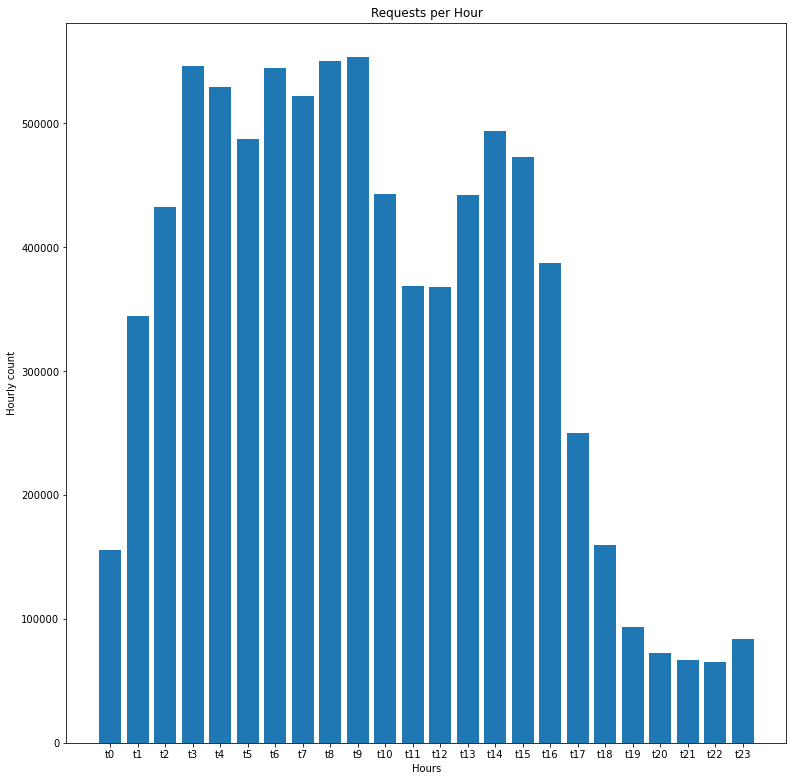

In [14]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_axes([0,0,1,1],)
ax.bar(times_span, count_number)
plt.xlabel("Hours")
plt.ylabel("Hourly count")
plt.title('Requests per Hour')
plt.show()

You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)

In [15]:
count_number
idx=-1
hold_req=[]
hold_idx=[]
for i in count_number:
    idx += 1
    if ((i >= 400000) & (i <= 490000)):
        hold_req.append(i)
        hold_idx.append(idx)
selected_time = [times_span[i] for i in hold_idx]
print(selected_time)
print(hold_req)

['t2', 't5', 't10', 't13', 't15']
[432289, 487306, 443413, 442414, 472843]


2.2 Server Analysis
Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart.

In [16]:
df2["sc-status"].unique()

array([200., 304., 206., 404., 301., 302., 500., 501., 400., 403., 406.,
       416.])

In [17]:
count_sc_status = df2["sc-status"].value_counts().sort_index()
count2 = count_sc_status[count_sc_status.gt(10000)]

Server Status

Text(0.5, 1.0, 'Server Status')

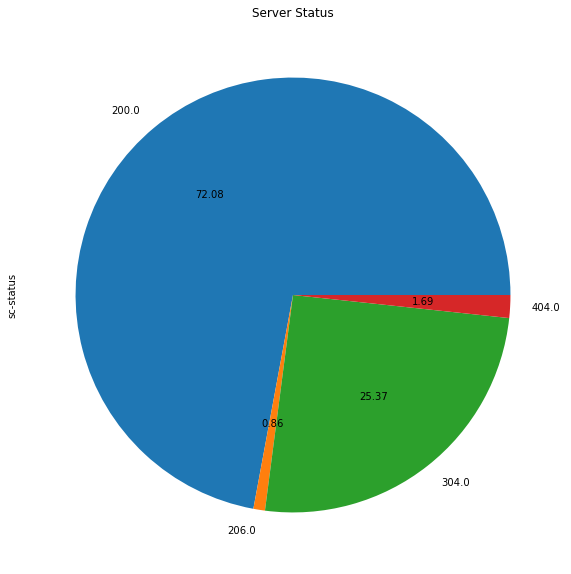

In [18]:
count2.plot.pie(autopct = '%.2f',figsize=(10, 10),)
plt.title("Server Status")

2.3 Geographic Analysis
2.3.A Requests by Country
1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59.
2. Discover on the demographics by analysing requests from country level.
3. Plot countries of all requests in pie chart.
4. List top 3 with the numbers of requests.

In [19]:
!pip install ip2geotools
from ip2geotools.databases.noncommercial import DbIpCity

In [38]:
requests_by_country = df2[(df2["time"].str[:2]=="20") & (df2["date"]=="2007-01-01")]
requests_by_country['Country'] = requests_by_country.apply(lambda row: DbIpCity.get(row['c-ip'],api_key='free').country, axis=1)

<ipython-input-38-b2e5a8e5fccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_by_country['Country'] = requests_by_country.apply(lambda row: DbIpCity.get(row['c-ip'],api_key='free').country, axis=1)


In [54]:
requests_by_country

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status,time_fomat,Country
28823,2007-01-01,20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80.0,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0,2021-04-19 20:00:00,HK
28824,2007-01-01,20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80.0,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0,2021-04-19 20:00:00,HK
28825,2007-01-01,20:01:12,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/HarbourViewRoom02.jpg,80.0,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,2021-04-19 20:01:12,IT
28826,2007-01-01,20:01:48,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SkyLounge01.jpg,80.0,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,2021-04-19 20:01:48,IT
28827,2007-01-01,20:01:57,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SuperiorRoom01.jpg,80.0,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,2021-04-19 20:01:57,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29032,2007-01-01,20:52:46,W3SVC1,127.0.0.1,GET,/robots.txt,80.0,74.6.85.161,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404.0,0.0,2.0,2021-04-19 20:52:46,US
29033,2007-01-01,20:52:48,W3SVC1,127.0.0.1,GET,/Tulip/dining/zh-hk/dining_cafeserena.aspx,80.0,74.6.85.206,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,200.0,0.0,0.0,2021-04-19 20:52:48,US
29034,2007-01-01,20:59:04,W3SVC1,127.0.0.1,GET,/Tulip/whatsnew/whatsnew_roomsdetail.aspx,80.0,202.160.178.181,Mozilla/5.0+(compatible;+Yahoo!+Slurp+China;+h...,200.0,0.0,0.0,2021-04-19 20:59:04,CN
29035,2007-01-01,20:59:40,W3SVC1,127.0.0.1,GET,/robots.txt,80.0,74.6.75.47,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404.0,0.0,2.0,2021-04-19 20:59:40,US


In [57]:
country = requests_by_country['Country'].value_counts()
print(country_cnt)

HK    169
CN     25
US     16
IT      3
AU      1
Name: Country, dtype: int64


In [58]:
count = requests_by_country['Country'].value_counts().sort_values(ascending=False)
count[:3]

HK    169
CN     25
US     16
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Request by Country'}, ylabel='Country'>

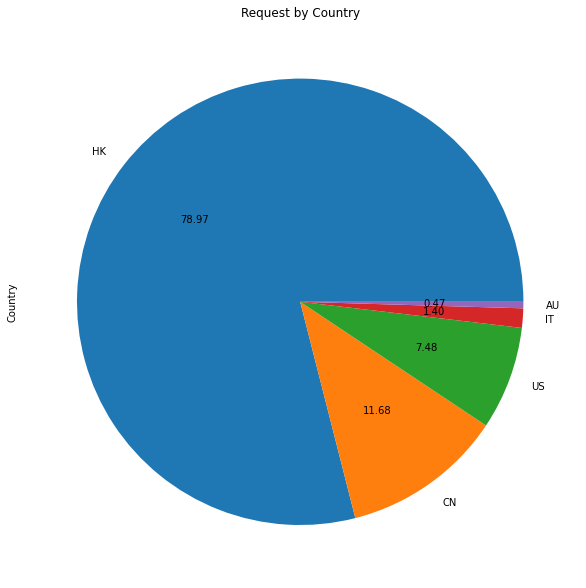

In [59]:
count.plot.pie(autopct = '%.2f',figsize=(10, 15),title="Request by Country")

2.3.B Requests by City
1. Discover on the demographics by analysing requests from city level.
2. Plot cities of all requests in pie chart.
3. List top 3 with the numbers of requests.

In [62]:
requests_by_country['City'] = requests_by_country.apply(lambda row: DbIpCity.get(row['c-ip'],api_key='free').city, axis=1)
city = requests_by_country['City'].value_counts()
print(city)

Ha Kwai Chung                         166
Beijing                                15
New York                               14
Jinrongjie (Xicheng District)           9
Valcanneto                              3
Hong Kong                               2
San Francisco (Financial District)      1
Hangzhou                                1
Quarry Bay                              1
Mountain View                           1
Sydney                                  1
Name: City, dtype: int64


<ipython-input-62-bf0948258117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_by_country['City'] = requests_by_country.apply(lambda row: DbIpCity.get(row['c-ip'],api_key='free').city, axis=1)


In [65]:
count_city = requests_by_country['City'].value_counts().sort_values(ascending=False)
count_city[:3]

Ha Kwai Chung    166
Beijing           15
New York          14
Name: City, dtype: int64

<AxesSubplot:title={'center':'Request by Country'}, ylabel='City'>

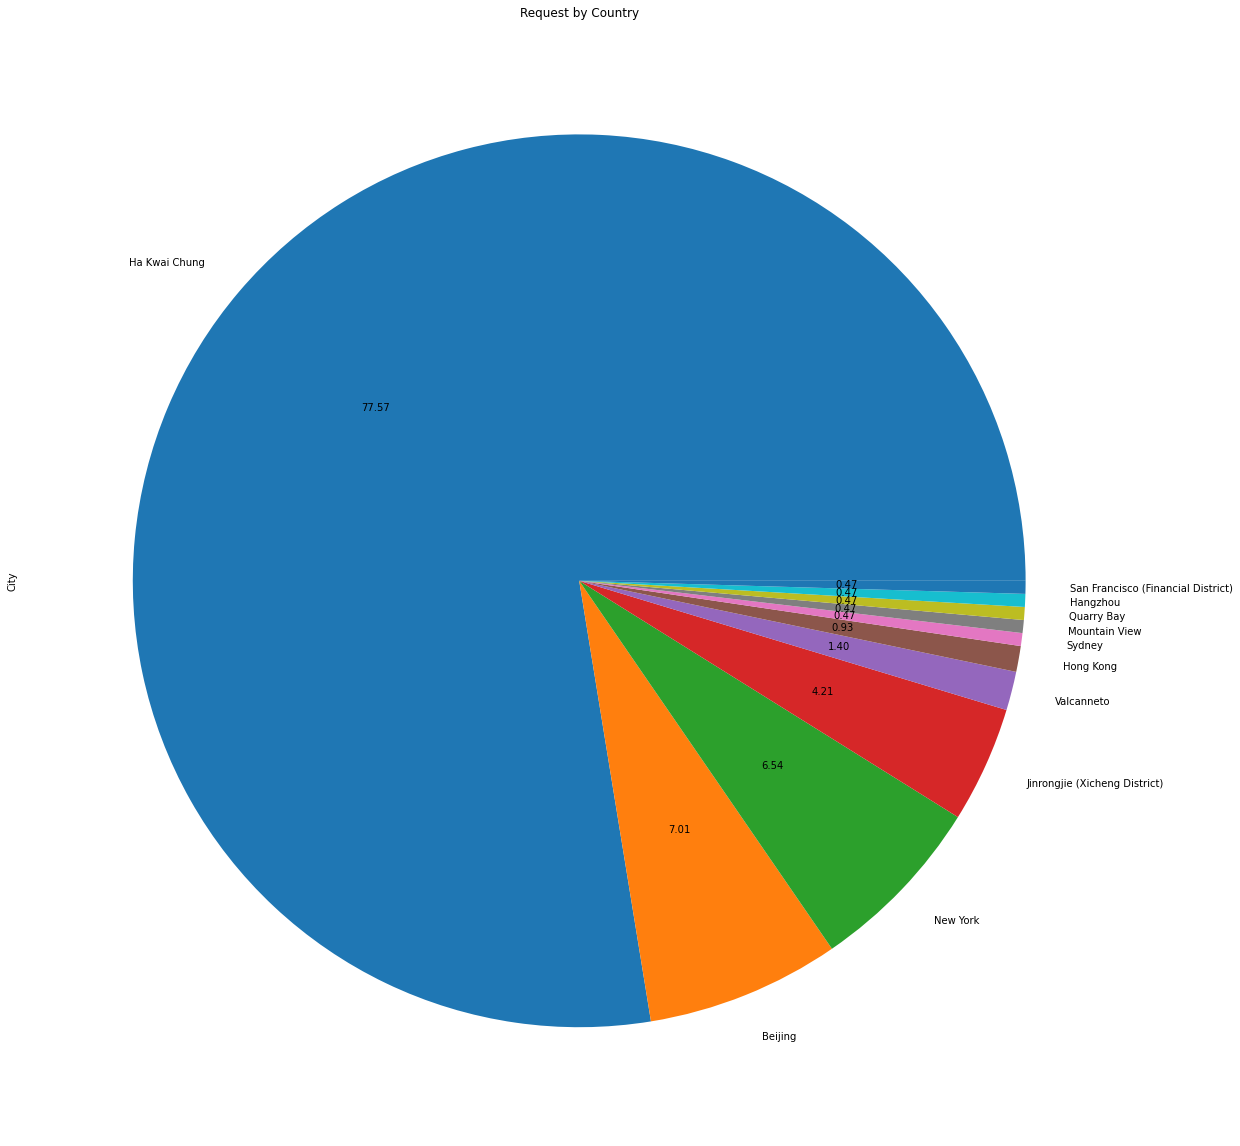

In [69]:
count_city.plot.pie(autopct = '%.2f',figsize=(20, 39),title="Request by Country")

Part II - Web Crawling
3. Professor List Generation
3.1 Import and install web crawling library.

Import and install your web crawling library here.

In [ ]:
!pip install beautifulSoup
!pip install wget
!pip install selenium
!pip install lxml
!pip install requests
!pip install html5lib
import selenium
import wget
from bs4 import BeautifulSoup
import urllib.request
import requests

In [63]:
url = "https://www.deakin.edu.au/information-technology/staff-listing"
wb_data = requests.get(url)
soup = BeautifulSoup(wb_data.text, "lxml")
print(soup)

NameError: name 'requests' is not defined

In [ ]:
titles = soup.select('<a href="https://www.deakin.edu.au/about-deakin/people/lynn-batten" target="_blank">Emeritus Professor Lynn Batten</a>')
contents = soup.select('#mainBox > main > div.article-list > div > p > a')
readers = soup.select(
    '#mainBox > main > div.article-list > div > div.info-box.d-flex.align-content-center > p:nth-child(3) > span > span')

for title, content, reader in zip(titles, contents, readers):
    data = {
        'title': list(title.stripped_strings),
        'content': content.get_text(),
        'readers': reader.get_text()
    }
    print(data)